In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('../../Data/nfl_verse_participation/participation_final.csv')
df

,Unnamed: 0.1,Unnamed: 0,play_id,game_id,old_game_id,home_team,away_team,season_type,week,OffenseTeam,...,num_injuries,Avg_Temp,Avg_Percipitation_Prob_Percent,HOME_day_since_last_game,AWAY_day_since_last_game,Player-Injured-On-Play,offense_formation,offense_players,defense_players,defenders_in_box
0,0,0,35,2019_01_GB_CHI,2019090500,CHI,GB,REG,1,GB,...,0.0,60.962724,7.349616,8.14551,8.256925,0,NaN,00-0033635;00-0032661;00-0034353;00-0034372;00...,00-0034179;00-0031787;00-0033757;00-0033121;00...,NaN
1,1,1,50,2019_01_GB_CHI,2019090500,CHI,GB,REG,1,GB,...,0.0,60.962724,7.349616,8.14551,8.256925,0,I_FORM,00-0031381;00-0033293;00-0031019;00-0034272;00...,00-0031040;00-0027957;00-0033784;00-0029577;00...,7.0
2,2,2,71,2019_01_GB_CHI,2019090500,CHI,GB,REG,1,GB,...,0.0,60.962724,7.349616,8.14551,8.256925,0,I_FORM,00-0031381;00-0033293;00-0031019;00-0034272;00...,00-0031040;00-0027957;00-0033784;00-0029577;00...,8.0
3,3,3,95,2019_01_GB_CHI,2019090500,CHI,GB,REG,1,GB,...,0.0,60.962724,7.349616,8.14551,8.256925,0,SHOTGUN,00-0031381;00-0033293;00-0031019;00-0032626;00...,00-0031040;00-0027957;00-0033784;00-0029577;00...,5.0
4,4,4,125,2019_01_GB_CHI,2019090500,CHI,GB,REG,1,GB,...,0.0,60.962724,7.349616,8.14551,8.256925,0,NaN,00-0033757;00-0034162;00-0034168;00-0031584;00...,00-0028075;00-0034372;00-0035696;00-0033556;00...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88331,88331,88331,4256,2020_21_KC_TB,2021020700,TB,KC,POST,21,KC,...,0.0,60.962724,7.349616,8.14551,8.256925,0,SHOTGUN,00-0034301;00-0030506;00-0031958;00-0033873;00...,00-0034374;00-0034778;00-0036411;00-0034773;00...,5.0
88332,88332,88332,4280,2020_21_KC_TB,2021020700,TB,KC,POST,21,KC,...,0.0,60.962724,7.349616,8.14551,8.256925,0,SHOTGUN,00-0034301;00-0030506;00-0031958;00-0033873;00...,00-0034374;00-0034778;00-0036411;00-0034773;00...,6.0
88333,88333,88333,4307,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,...,0.0,60.962724,7.349616,8.14551,8.256925,0,NaN,00-0029895;00-0034816;00-0034668;00-0031273;00...,00-0034296;00-0036378;00-0032215;00-0031348;00...,8.0
88334,88334,88334,4328,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,...,0.0,60.962724,7.349616,8.14551,8.256925,0,NaN,00-0029895;00-0034816;00-0034668;00-0031273;00...,00-0034296;00-0036378;00-0032215;00-0031348;00...,8.0


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'play_id', 'game_id', 'old_game_id',
       'home_team', 'away_team', 'season_type', 'week', 'OffenseTeam',
       'DefenseTeam', 'side_of_field', 'yardline_100', 'date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'drive', 'Quarter', 'Down',
       'YardsToGo', 'Description', 'play_type', 'yards_gained',
       'Offteam_score', 'defteam_score', 'score_differential', 'season',
       'series', 'series_success', 'series_result', 'stadium', 'play_type_nfl',
       'drive_play_count', 'drive_time_of_possession', 'roof', 'surface_type',
       'num_plays', 'num_injuries', 'Avg_Temp',
       'Avg_Percipitation_Prob_Percent', 'HOME_day_since_last_game',
       'AWAY_day_since_last_game', 'Player-Injured-On-Play',
       'offense_formation', 'offense_players', 'defense_players',
       'defenders_in_box'],
      dtype='object')

In [6]:
total_injuries = df['Player-Injured-On-Play'].value_counts()
total_injuries

0    86822
1     1514
Name: Player-Injured-On-Play, dtype: int64

In [7]:
injury_proportion = total_injuries[1] / total_injuries[0]
injury_proportion*100

1.743797654972242

In [ ]:
# Mean, mode and median per play
injuries_per_play = df['Player-Injured-On-Play']

mean = injuries_per_play.mean()
median = injuries_per_play.median()
mode_result = stats.mode(injuries_per_play, keepdims=True) 
mode = mode_result.mode[0] 
mode_count = mode_result.count[0]  


print(f"Mean of injuries per play: {mean}")

Mean of injuries per play: 0.017139105234558957


In [ ]:
# Mean, mode and median per game
injuries_per_game = df.groupby('game_id')['Player-Injured-On-Play'].sum()

mean = injuries_per_game.mean()
median = injuries_per_game.median()
mode_result = stats.mode(injuries_per_game, keepdims=True)  
mode = mode_result.mode[0]  
mode_count = mode_result.count[0]  


print(f"Mean of injuries per game: {mean}")
print(f"Median of injuries per game: {median}")
print(f"Mode of injuries per game: {mode}, occurred {mode_count} times")

Mean of injuries per game: 2.824626865671642
Median of injuries per game: 3.0
Mode of injuries per game: 2, occurred 112 times


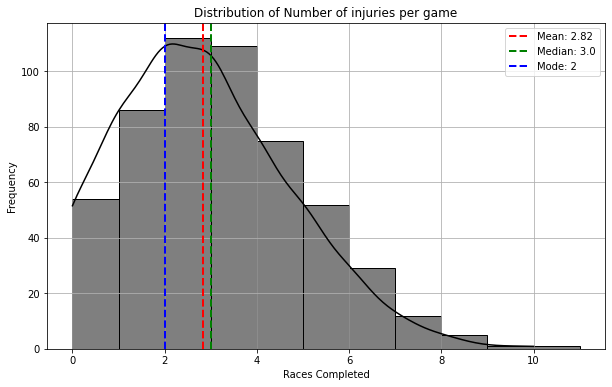

In [10]:
plt.figure(figsize=(10, 6), facecolor='white')
sns.histplot(injuries_per_game, kde=True, color="black", binwidth=1, binrange=(injuries_per_game.min(), injuries_per_game.max() + 1))

plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode}')

plt.title('Distribution of Number of injuries per game')
plt.xlabel('Races Completed')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Range, Quartiles, Variance, Standard Deviation, and Interquartile Range

range_counts = injuries_per_game.max() - injuries_per_game.min()
quartiles = injuries_per_game.quantile([0.25, 0.5, 0.75])
variance = injuries_per_game.var()
std_dev = injuries_per_game.std()
iqr = quartiles[0.75] - quartiles[0.25]
outlier_low = 0
outlier_high = quartiles[0.75] + 1.5 * iqr

print(f"Range: {range_counts}")
print(f"Quartiles:\n{quartiles}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Interquartile Range: {iqr}")

Range: 10
Quartiles:
0.25    1.0
0.50    3.0
0.75    4.0
Name: Player-Injured-On-Play, dtype: float64
Variance: 3.4981587390152047
Standard Deviation: 1.8703365309524391
Interquartile Range: 3.0


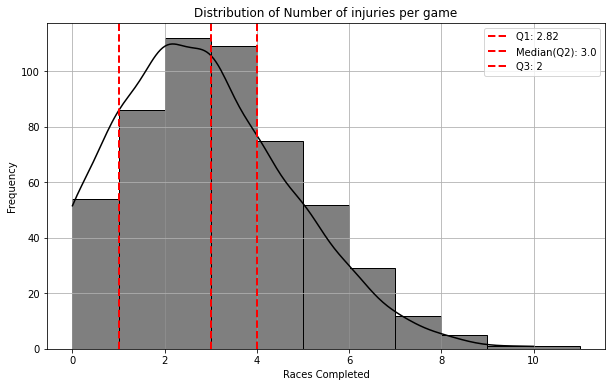

In [12]:
plt.figure(figsize=(10, 6), facecolor="white")
sns.histplot(injuries_per_game, kde=True, color="black", binwidth=1, binrange=(injuries_per_game.min(), injuries_per_game.max() + 1))

plt.axvline(quartiles[0.25], color='red', linestyle='dashed', linewidth=2, label=f'Q1: {mean:.2f}')
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median(Q2): {median}')
plt.axvline(quartiles[0.75], color='red', linestyle='dashed', linewidth=2, label=f'Q3: {mode}')

plt.title('Distribution of Number of injuries per game')
plt.xlabel('Races Completed')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

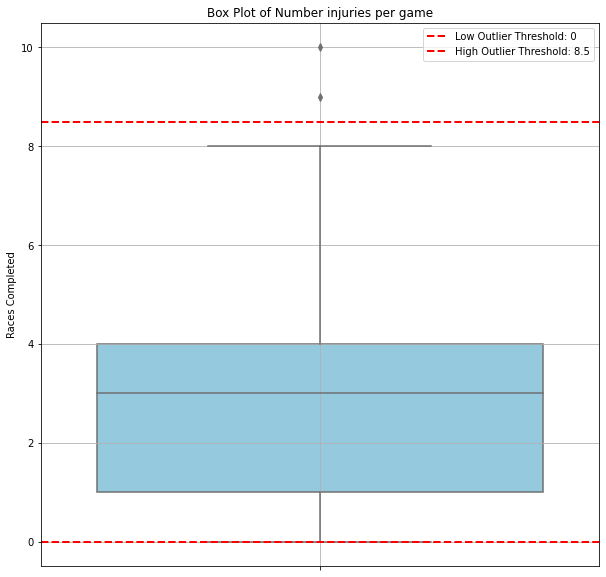

In [13]:
plt.figure(figsize=(10, 10), facecolor='white')
sns.boxplot(y=injuries_per_game, color="skyblue")

plt.axhline(outlier_low, color='red', linestyle='dashed', linewidth=2, label=f'Low Outlier Threshold: {outlier_low}')
plt.axhline(outlier_high, color='red', linestyle='dashed', linewidth=2, label=f'High Outlier Threshold: {outlier_high}')

plt.title('Box Plot of Number injuries per game')
plt.ylabel('Races Completed')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
injuries_per_play = df.groupby('play_type')['Player-Injured-On-Play'].sum()

/var/folders/6s/frb3c33d19nbynjcbrvxx7t80000gn/T/ipykernel_9891/3569550359.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')  # Ensure white background


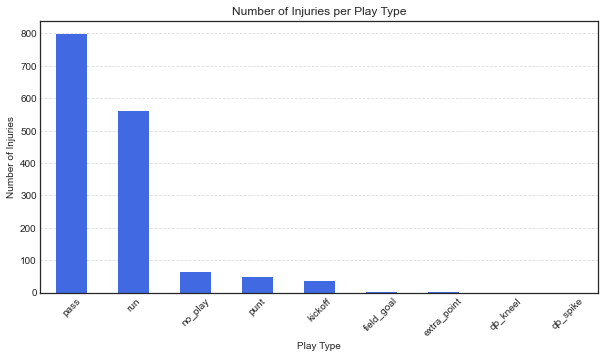

In [ ]:
# Sort by number of injuries in descending order
injuries_per_play = injuries_per_play.sort_values(ascending=False)


plt.style.use('seaborn-white')  
injuries_per_play.plot(kind='bar', figsize=(10, 5), color='royalblue')
plt.xlabel("Play Type")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries per Play Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/6s/frb3c33d19nbynjcbrvxx7t80000gn/T/ipykernel_9891/2431958745.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


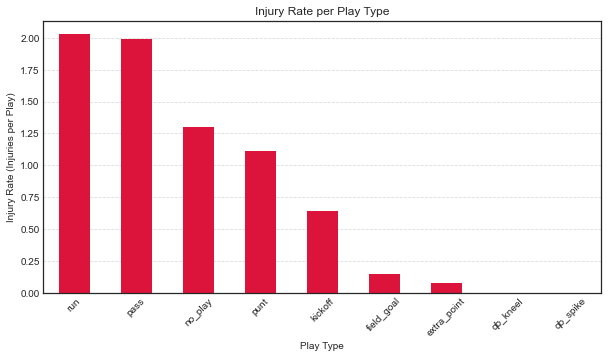

In [ ]:
# Count total number of plays per play type
total_plays_per_type = df['play_type'].value_counts()

#Compute injury rate
injury_rate = injuries_per_play / total_plays_per_type
injury_rate = injury_rate*100
injury_rate = injury_rate.sort_values(ascending=False)

# Plot
plt.style.use('seaborn-white')
plt.figure(figsize=(10, 5))
injury_rate.plot(kind='bar', color='crimson')
plt.xlabel("Play Type")
plt.ylabel("Injury Rate (Injuries per Play)")
plt.title("Injury Rate per Play Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()